In [ ]:
'''Objective: Build a model to predict the band gap of a material based on what element it is,
            its position in space, and its lattice information, using regression based machine learning'''


'''Version goal: to combine all three datasets into a single array X to use in training '''


'''Future Version goal: to improve the accuracy predicted by the model'''

In [39]:
#Call data

from aflow import *

result = search(batch_size=20
        ).filter(K.Egap > 1
        ).filter(K.nspecies == 1
        ).filter(K.natoms == 3)

#part = result[0:1000]

#len(part)
#print(result[0].Egap)
for entry in result[0:5]:
    print(entry.Egap)

1.0032
1.0066
2.3992
3.3885
8.3183


In [40]:
#make data right type/shape

#make X1 from atomic name to atomic number
from mendeleev import element
import numpy as np

at_num = []

for i in result[0:6]:
    ele = (i.species[0])
    z= ele.replace('\n','')
    number= element(z).atomic_number
    #print(number)
    at_num.append(number)
    
#print(at_num)

x1= np.asarray(at_num).reshape(-1,1)
print(x1)

[[34]
 [ 9]
 [16]
 [ 8]
 [18]
 [10]]


In [42]:
import numpy as np
pos=[]
for entry in result[0:6]:
    x2= entry.positions_fractional
    pos.append(x2)

#print(pos)

X2= np.asarray(pos).reshape(6,9)

print(X2)

[[ 0.21906427 -0.          0.333333   -0.          0.21906427  0.66666633
   0.78093573  0.78093573 -0.        ]
 [ 0.          0.7702899   0.33333333  0.2297101   0.2297101   0.66666667
   0.7702899   0.          0.        ]
 [ 0.          0.83014186  0.33333333  0.16985814  0.16985814  0.66666667
   0.83014186  0.          0.        ]
 [ 0.          0.84434152  0.33333333  0.15565848  0.15565848  0.66666667
   0.84434152  0.          0.        ]
 [ 0.          0.66717743  0.33333333  0.33282257  0.33282257  0.66666667
   0.66717743  0.          0.        ]
 [ 0.          0.66595466  0.33333333  0.33404534  0.33404534  0.66666667
   0.66595466  0.          0.        ]]


In [43]:

geo=[]

for entry in result[0:6]:
    #x2= entry.positions_fractional
    #X2.append(x2)
    
    x3= entry.geometry
    #print(X3)
    geo.append(x3)
    
#print(geo)


x3=np.asarray(geo).reshape(6,6)

print(x3)


[[  4.523779   4.523779   5.049212  90.        90.       120.      ]
 [  3.546542   3.546542   3.910963  90.        90.       120.      ]
 [  4.962433   4.962433   4.412037  90.        90.       120.      ]
 [  3.733926   3.733926   3.113593  90.        90.       120.      ]
 [  4.970289   4.970289   6.944262  90.        90.       120.      ]
 [  3.458094   3.458094   6.266973  90.        90.       120.      ]]


In [44]:
X= np.hstack((x3,x1,X2))


X.shape

(6, 16)

In [45]:
y=[]
for entry in result[0:6]:
    BG= entry.Egap
    y.append(BG)
    
Y=np.asarray(y).reshape(-1,1)

print(Y)

[[ 1.0032]
 [ 1.0066]
 [ 2.3992]
 [ 3.3885]
 [ 8.3183]
 [11.4992]]


In [46]:
#Split the data

from sklearn.cross_validation import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)

C:\Users\Katie\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
#implement KNeighborsRegressor---choose estimator

from sklearn.neighbors import KNeighborsRegressor
estimator = KNeighborsRegressor(4, weights='distance', algorithm='kd_tree', leaf_size=3000,)

In [66]:
#train data

#X2_train, X3_train,

import numpy as np
import matplotlib.pyplot as plt

estimator.fit(X_train,  Y_train)
y_predicted = estimator.predict(X_test)

#test the accuracy
accuracy = np.mean(Y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))



The accuracy is 0.0%


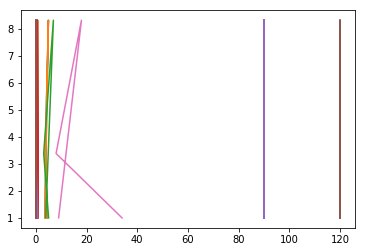

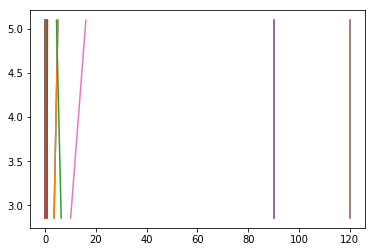

In [67]:
plt.plot(X_train, Y_train)
plt.show()
plt.plot(X_test, y_predicted)
plt.show()